In [11]:
import pandas as pd
import xarray as xr
import numpy as np
import datarail.utils.plate_fcts as pltfct
import datarail.data_processing.drug_response.qc_plate as qcfct
import datarail.import_modules.columbus_import_functions as CoImp
import datarail.data_processing.drug_response.treatment_annotation as TrtAnnot
    
import matplotlib.pyplot as plt
%matplotlib inline



# load the synthetic data (Columbus output)
df = CoImp.Columbus_processing('../tests/drug_response_data/OUTPUT/Example1_Columbus_output.tsv')
# alternatively, one can load already processed and annotated data:
#       df = pd.read_csv('../tests/drug_response_data/OUTPUT/Example1_biased_results.tsv', sep='\t')

df.head()

Default number of fields: 6 ; 345 wells with missing field(s)


,barcode,date,Row,Column,well,cell_count,cell_count__total,corpse_count,cell_count__dead
0,MH1_01,2016-06-06 12:34:56,2,3,B03,470.0,509.0,34.0,39.0
1,MH1_01,2016-06-06 12:34:56,2,4,B04,496.0,535.0,30.0,39.0
2,MH1_01,2016-06-06 12:34:56,2,5,B05,517.0,557.0,26.0,40.0
3,MH1_01,2016-06-06 12:34:56,2,6,B06,434.0,475.0,56.0,41.0
4,MH1_01,2016-06-06 12:34:56,2,7,B07,454.0,490.0,28.0,36.0


In [2]:
# convert to an xarray (for QC)
xray = pltfct.dfplate2xr(df)
xray

<xarray.Dataset>
Dimensions:            (barcode: 12, column: 20, row: 14)
Coordinates:
  * barcode            (barcode) object 'MH1_01' 'MH1_02' 'MH1_03' 'MH1_04' ...
  * row                (row) int64 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * column             (column) int64 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    date               (barcode, row, column) datetime64[ns] 2016-06-06T12:34:56 ...
    Row                (barcode, row, column) int64 2 2 2 2 2 2 2 2 2 2 2 2 ...
    Column             (barcode, row, column) int64 3 4 5 6 7 8 9 10 11 12 ...
    well               (barcode, row, column) object 'B03' 'B04' 'B05' 'B06' ...
    cell_count         (barcode, row, column) float64 470.0 496.0 517.0 ...
    cell_count__total  (barcode, row, column) float64 509.0 535.0 557.0 ...
    corpse_count       (barcode, row, column) float64 34.0 30.0 26.0 56.0 ...
    cell_count__dead   (barcode, row, column) float64 39.0 39.0 40.0 41.0 ...
Attributes:
    plate_dims: [16, 2

/Users/mah47/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/mah47/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


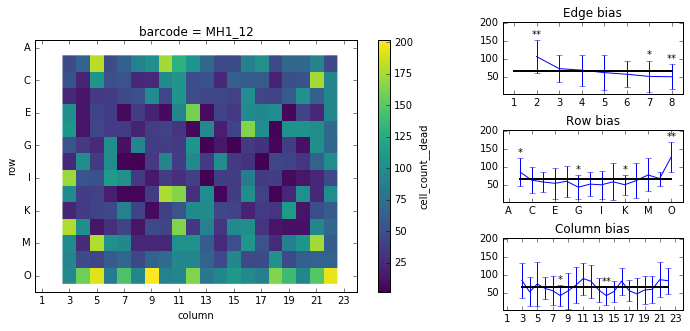

In [3]:
# QC for plate bias
qcfct.Plate_bias(xray, filename='OUTPUT/QC_report.pdf')
qcfct.Plate_bias(xray, variable='cell_count__dead', filename='OUTPUT/QC_report_deadcells.pdf')

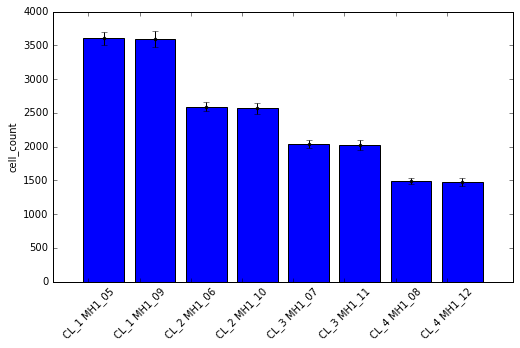

In [12]:
# annotate the data to run the QC across negative controls
df_annotated = TrtAnnot.add_treatments(TrtAnnot.add_plate_info(df, 
                            pd.read_csv('../tests/drug_response_data/OUTPUT/Example1_plate_info.tsv', sep='\t')),
                             '../tests/drug_response_data/OUTPUT/')
qcfct.Negative_control_bias(df_annotated, filename='OUTPUT/QC_report_negative_contols.pdf')